Task - Prediction using Decision Tree Algorithm

Name - Sourav Dey


Problem Statement - Create the Decision Tree Classifier and Visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv('/content/iris_data.csv')

In [3]:
# top 5 rows
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# last 5 rows
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# checking shape
iris_df.shape

(150, 6)

In [6]:
# basic info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# statistical description
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# checking null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis

In [9]:
# Target Variable = Species
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

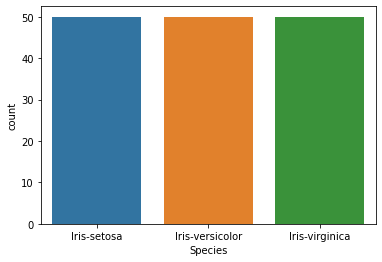

In [11]:
sns.countplot(iris_df["Species"]);

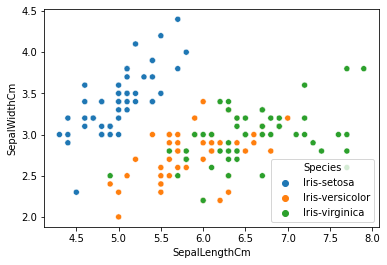

In [12]:
# comparing Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=iris_df);

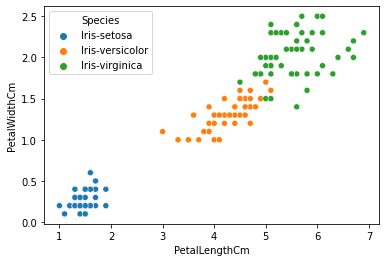

In [13]:
# comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=iris_df);

Data Preprocessing

Id column is of no use for our analysis.

In [14]:
# removing id column
iris_df = iris_df.drop(columns = 'Id', axis = 1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris_df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
iris_df['Species']= label_encoder.fit_transform(iris_df['Species'])

In [17]:
iris_df["Species"].unique()

array([0, 1, 2])

In [18]:
Y = iris_df["Species"]                                # Target variable
X = iris_df.drop(columns = "Species", axis = 1)

Decision Tree Classifier


A decision tree is a type of supervised learning algorithm that can be used for classification as well as regression problems. The decision tree works on an if-then statement. It learns from the training data by creating a tree structure.


It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [19]:
# importing model
from sklearn.tree import DecisionTreeClassifier

# fitting model
classifier = DecisionTreeClassifier()
model = classifier.fit(X, Y)                              #training the classifier
print("model trained successfully")

model trained successfully


Visualize Decision Tree with graphviz

In [20]:
feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target_names = ['setosa', 'versicolor', 'virginica']

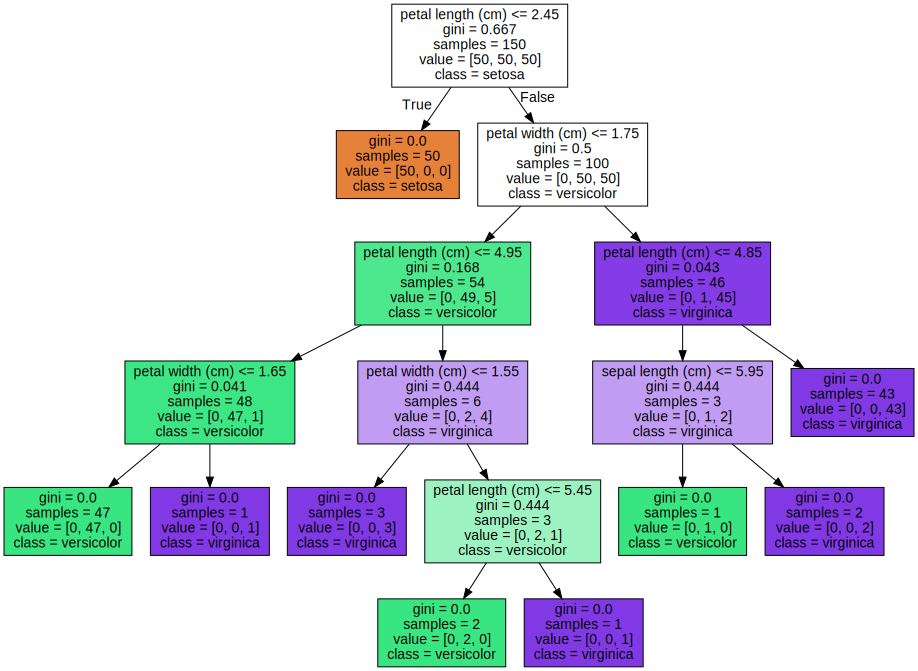

In [21]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [23]:
!pip install dtreeviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 825 kB/s 


Visualize Decision Tree with dtreeviz

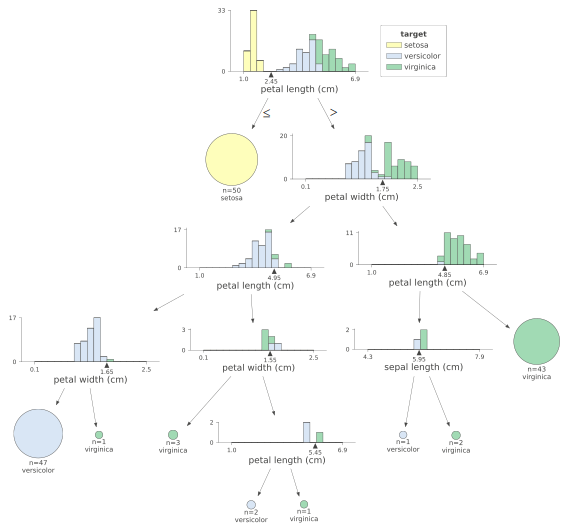

In [24]:
from dtreeviz.trees import dtreeviz       # remember to load the package

viz = dtreeviz(classifier, X, Y,
                target_name="target",
                feature_names=feature_names,
                class_names=list(target_names)
                )

viz

Conclusion

This Decision Tree classifier is capable of predicting right class when new data is feeded.